In [1]:
print("all ok")

all ok


In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [3]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.\n\nI also remember that the wall isn't a single continuous structure

In [4]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI should consider the different dynasties and how much each contributed to the wall. The Qin Dynasty, I think, was the first to build a long version of the wall, but it was probably not as extensive as later versions. Then the Han Dynasty might have extended it further. The most famous parts were probably built during the Ming Dynasty, which was much later.\n\nI also remember that the wall isn't a single continuous structure. There are sectio

In [5]:
from langchain.tools import tool

## this is my custom tools

In [6]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [9]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [10]:
search.invoke("what is the latest update on iphone17 release?")

c:\Users\samra\anaconda3\envs\agentic_2_base\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


'2 days ago · Latest news headlines from India & around the world. Check out today’s news coverage live with videos & photos on … Latest News on Politics, India, Current affairs. The Times of India Covers all latest breaking news across India and world 1 day ago · While Tejashwi pledges that no Bihari will need to migrate for jobs under RJD rule, Nitish claims his govt has provided 12 … Latest News - Get todays breaking news from India and World. Browse all current news, live news from politics, sports, entertainment, tech, education and much more at Hindustan Times Welcome to The Hindu for the latest news, top headlines, and live updates covering politics, business, technology, entertainment, and more. #TheHindu'

In [11]:
tools=[multiply, add, divide, search]

In [12]:
llm_with_tools=llm.bind_tools(tools)

In [13]:
response=llm_with_tools.invoke("hi")

In [14]:
response.content

'Hello! How can I assist you today?'

In [15]:
response.tool_calls

[]

In [16]:
response=llm_with_tools.invoke("what is 2+2?")

In [17]:
response.content

''

In [18]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'ft9d616s5',
  'type': 'tool_call'}]

In [19]:
response=llm_with_tools.invoke("what is 10/2?")

In [20]:
response.content

''

In [21]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '8c76vhnc8',
  'type': 'tool_call'}]

In [22]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [27]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0r3shn8vw', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 417, 'prompt_tokens': 402, 'total_tokens': 819, 'completion_time': 1.680069816, 'prompt_time': 0.032320324, 'queue_time': 0.057850386000000004, 'total_time': 1.7123901400000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--77a0d434-e99a-42e7-8eb0-6b8b84656663-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': '0r3shn8vw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 417, 'total_tokens': 819})

In [ ]:
response.content

''

In [26]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': '0r3shn8vw',
  'type': 'tool_call'}]

In [32]:
def function_1(state:MessagesState):
    pass

In [33]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [34]:
builder=StateGraph(MessagesState)

In [ ]:
builder.add_node("llm_decision_step",function_1)

In [36]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001F268978160>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001F246D88AF0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001F268978280>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [37]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [38]:
builder.add_edge(START,"llm_decision_step")

In [41]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [42]:
builder.add_edge("tools","llm_decision_step")

In [43]:
react_graph=builder.compile()

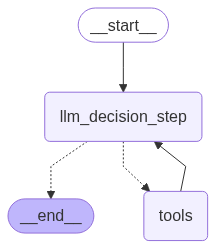

In [44]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))